# Importing the required modules

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split as tts

In [3]:
df = pd.read_csv('RAT01.csv')
df1 = pd.read_csv('RAT02.csv')
df2 = pd.read_csv('RAT03.csv')
df3 = pd.read_csv('RAT04.csv')
df4 = pd.read_csv('RAT05.csv')
df5 = pd.read_csv('RAT06.csv')
df6 = pd.read_csv('RAT07.csv')
df7 = pd.read_csv('RAT08.csv')
for i in (df.columns.values):
    print(type(i))


<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [4]:
df.head()
df.shape


(89733, 7)

In [5]:
dfs = []  # List to store the DataFrames

for i in range(1, 9):
   file_name = f'RAT0{i}.csv'  # Construct the file name
   df = pd.read_csv(file_name)  # Read the CSV file into a DataFrame
   df['Target'] = file_name[:-4]# Add an 'Target' column with values as filename without extection
   dfs.append(df)  # Append the DataFrame to the list
df_merge = pd.concat(dfs,ignore_index=True)

print(df_merge.columns)
# dfs =[df,df1,df2,df3,df4,df5,df6,df7]
# df_merge = pd.concat(dfs,ignore_index=True)

Index(['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info',
       'Target'],
      dtype='object')


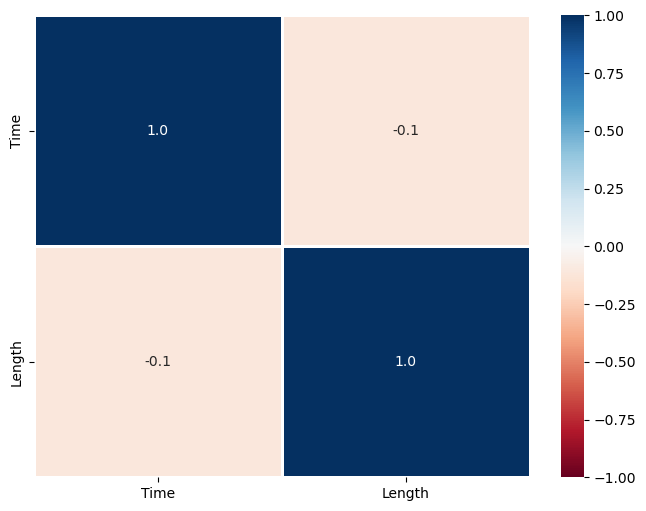

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns of interest from your DataFrame
selected_columns = df_merge[['Time', 'Length']]

# ['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info']
# Calculate the correlation matrix for these selected columns
correlation_matrix = selected_columns.corr()

# Create a figure with the desired size
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(correlation_matrix, cmap='RdBu', center=0, vmin=-1, vmax=1, annot=True, fmt='.1f', linewidths=2)

# Show the heatmap
plt.show()


In [7]:
Y = df_merge['Target']
Y = Y.map({'RAT01':0,
           'RAT02':1,'RAT03':2,'RAT04':3,'RAT05':4,'RAT06':5,'RAT07':6,'RAT08':7})
X = df_merge.drop("Target",axis=1)
X.shape

(563334, 7)

In [8]:
df_merge.head() 

,No.,Time,Source,Destination,Protocol,Length,Info,Target
0,1,0.000000,10.8.0.61,8.8.8.8,DNS,76,Standard query 0x04da A infinitedata-pa.google...,RAT01
1,2,0.016637,10.8.0.61,8.8.8.8,TCP,60,45949 > 853 [SYN] Seq=0 Win=65535 Len=0 MSS=...,RAT01
2,3,0.017375,8.8.8.8,10.8.0.61,TCP,60,"853 > 45949 [SYN, ACK] Seq=0 Ack=1 Win=60192...",RAT01
3,4,0.017912,8.8.8.8,10.8.0.61,DNS,92,Standard query response 0x04da A infinitedata-...,RAT01
4,5,0.020687,10.8.0.61,8.8.8.8,TCP,52,45949 > 853 [ACK] Seq=1 Ack=1 Win=88064 Len=...,RAT01


In [9]:
X.Source.value_counts().sort_values(ascending=False).head(10)

10.8.0.93                          112298
157.240.30.27                      103254
147.32.83.181                       50035
10.8.0.61                           44945
157.240.30.63                       34676
10.8.0.249                          33736
216.58.201.99                       24371
2a03:2880:f03d:1c:face:b00c:0:3     20690
10.8.0.57                           20332
10.8.0.117                          16643
Name: Source, dtype: int64

In [10]:
top_10 = [x for x in X.Source.value_counts().sort_values(ascending=False).head(10).index]
top_10

['10.8.0.93',
 '157.240.30.27',
 '147.32.83.181',
 '10.8.0.61',
 '157.240.30.63',
 '10.8.0.249',
 '216.58.201.99',
 '2a03:2880:f03d:1c:face:b00c:0:3',
 '10.8.0.57',
 '10.8.0.117']

In [11]:
for label in top_10:
    X[label]=np.where(X['Source']==label,1,0)
X[['Source']+top_10].head(5)

,Source,10.8.0.93,157.240.30.27,147.32.83.181,10.8.0.61,157.240.30.63,10.8.0.249,216.58.201.99,2a03:2880:f03d:1c:face:b00c:0:3,10.8.0.57,10.8.0.117
0,10.8.0.61,0,0,0,1,0,0,0,0,0,0
1,10.8.0.61,0,0,0,1,0,0,0,0,0,0
2,8.8.8.8,0,0,0,0,0,0,0,0,0,0
3,8.8.8.8,0,0,0,0,0,0,0,0,0,0
4,10.8.0.61,0,0,0,1,0,0,0,0,0,0


In [12]:
top_10 = [x for x in X.Destination.value_counts().sort_values(ascending=False).head(10).index]
top_10

['147.32.83.181',
 '10.8.0.93',
 '10.8.0.249',
 '10.8.0.61',
 '10.8.0.57',
 '147.32.83.234',
 '2001:718:2:903:b877:48ae:9531:fbfc',
 '10.8.0.117',
 '157.240.30.27',
 '10.8.0.137']

In [13]:
for label in top_10:
    X[label]=np.where(X['Destination']==label,1,0)
X[['Destination']+top_10].head(5)

,Destination,147.32.83.181,10.8.0.93,10.8.0.249,10.8.0.61,10.8.0.57,147.32.83.234,2001:718:2:903:b877:48ae:9531:fbfc,10.8.0.117,157.240.30.27,10.8.0.137
0,8.8.8.8,0,0,0,0,0,0,0,0,0,0
1,8.8.8.8,0,0,0,0,0,0,0,0,0,0
2,10.8.0.61,0,0,0,1,0,0,0,0,0,0
3,10.8.0.61,0,0,0,1,0,0,0,0,0,0
4,8.8.8.8,0,0,0,0,0,0,0,0,0,0


In [14]:
top_10 = [x for x in X.Protocol.value_counts().sort_values(ascending=False).head(10).index]
top_10

['TCP',
 'QUIC',
 'TLSv1.3',
 'TLSv1.2',
 'GQUIC',
 'DNS',
 'ICMP',
 'IRC',
 'ICMPv6',
 'WebSocket']

In [15]:
for label in top_10:
    X[label]=np.where(X['Protocol']==label,1,0)
X[['Protocol']+top_10].head(5)

,Protocol,TCP,QUIC,TLSv1.3,TLSv1.2,GQUIC,DNS,ICMP,IRC,ICMPv6,WebSocket
0,DNS,0,0,0,0,0,1,0,0,0,0
1,TCP,1,0,0,0,0,0,0,0,0,0
2,TCP,1,0,0,0,0,0,0,0,0,0
3,DNS,0,0,0,0,0,1,0,0,0,0
4,TCP,1,0,0,0,0,0,0,0,0,0


In [16]:
X.drop(['Source','Destination','Protocol','Info'],axis=1,inplace=True)
X.shape

(563334, 26)

In [17]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(X,Y,test_size=.3,random_state=1)
y_train

557397    6
193851    2
277698    3
547701    6
378200    3
         ..
371403    3
491263    5
470924    4
491755    5
128037    1
Name: Target, Length: 394333, dtype: int64

In [18]:
x_train

,No.,Time,Length,10.8.0.93,157.240.30.27,147.32.83.181,10.8.0.61,157.240.30.63,10.8.0.249,216.58.201.99,...,TCP,QUIC,TLSv1.3,TLSv1.2,GQUIC,DNS,ICMP,IRC,ICMPv6,WebSocket
557397,42471,175.425611,83,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
193851,40814,254.574128,1401,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
277698,33209,242.417179,40,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
547701,32775,67.061160,1400,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
378200,133711,6478.267533,1400,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371403,126914,6474.430126,52,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
491263,17090,109.810933,1294,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
470924,31451,1964.326620,654,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
491755,17582,110.435982,508,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto',random_state=42)
x_res,y_res = sm.fit_resample(x_train,y_train)

In [20]:
x_res

,No.,Time,Length,10.8.0.93,157.240.30.27,147.32.83.181,10.8.0.61,157.240.30.63,10.8.0.249,216.58.201.99,...,TCP,QUIC,TLSv1.3,TLSv1.2,GQUIC,DNS,ICMP,IRC,ICMPv6,WebSocket
0,42471,175.425611,83,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,40814,254.574128,1401,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
2,33209,242.417179,40,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,32775,67.061160,1400,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,133711,6478.267533,1400,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090499,2238,1429.454583,64,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1090500,1174,231.445173,54,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1090501,2195,1415.082369,66,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1090502,800,228.354309,117,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [21]:
x_res.to_csv('x_res.csv')

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_res)
x_test = sc.transform(x_test)
x_train[1090500]

array([-0.9083848 , -0.48035492, -0.90690203, -0.23659402, -0.23498627,
       -0.26250692, -0.2521415 , -0.26600997, -0.28689503, -0.18914721,
       -0.25799982, -0.29749327, -0.28917454, -0.24460462, -0.3114879 ,
       -0.30175499,  0.8021697 , -0.50894584, -0.22136468, -0.22035081,
       -0.06684518, -0.03549252, -0.02507079, -0.02856369, -0.02296862,
       -0.01669874])

In [23]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20 , max_depth=15)
clf.fit(x_train,y_res)

RandomForestClassifier(max_depth=15, n_estimators=20)

In [24]:
clf.score(x_train,y_res)

0.9529089301827411

In [25]:
from sklearn.metrics import classification_report
y_pred_dt = clf.predict(x_test)
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97     26892
           1       0.99      0.94      0.96     18994
           2       0.89      0.94      0.91     27408
           3       1.00      0.97      0.98     58671
           4       0.99      0.94      0.96     10420
           5       0.90      0.99      0.94     12143
           6       0.86      0.96      0.91     13763
           7       0.98      1.00      0.99       710

    accuracy                           0.96    169001
   macro avg       0.95      0.96      0.95    169001
weighted avg       0.96      0.96      0.96    169001



# Prediction

In [26]:
import random

# Generate a list of 26 random numbers between -1 and 1
random_numbers = [random.uniform(-1, 8) for _ in range(26)]

# Print the list
print(random_numbers)

print(clf.predict([random_numbers])[0])

[6.584762133401821, 4.63239719300026, 6.632424131929358, 2.640328712143821, 7.14331968962107, 0.7273874884872777, 0.807215944834109, 0.9933372245440821, 6.290563642058973, -0.7057226108864456, 7.7540183923177235, 6.0101008415660955, 1.5232833399583265, 2.102784132121321, 0.9097958861442446, 3.6315971975216055, 1.329063500934021, 3.6834167503527286, 3.769433120875556, 5.118778227003234, -0.1571580583958525, 5.5137889577486625, 2.371891712750713, 0.8144070792709925, 5.097492151248428, 5.0092624198405975]
1


In [27]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_test,y_pred_dt) 
cmat

array([[25385,    75,   613,     3,    57,   360,   398,     1],
       [   56, 17777,   991,     0,     8,   106,    52,     4],
       [   15,    89, 25727,     0,     5,   248,  1323,     1],
       [  122,    60,  1057, 56864,    39,   228,   300,     1],
       [   17,    15,   123,     0,  9799,   332,   130,     4],
       [   13,     1,    43,     0,     0, 12077,     9,     0],
       [   34,    13,   346,     0,     0,   108, 13262,     0],
       [    0,     0,     0,     0,     0,     0,     0,   710]])

# Model accuracy 

In [28]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20 , max_depth=15)
clf.fit(x_train,y_res)

RandomForestClassifier(max_depth=15, n_estimators=20)

In [29]:
acc=clf.score(x_train,y_res)

In [30]:
acc = round(acc*100,2)
print(f'Accuracy of Random Forest classifier on training set: {acc} %')

Accuracy of Random Forest classifier on training set: 96.1 %


# Decision Tree

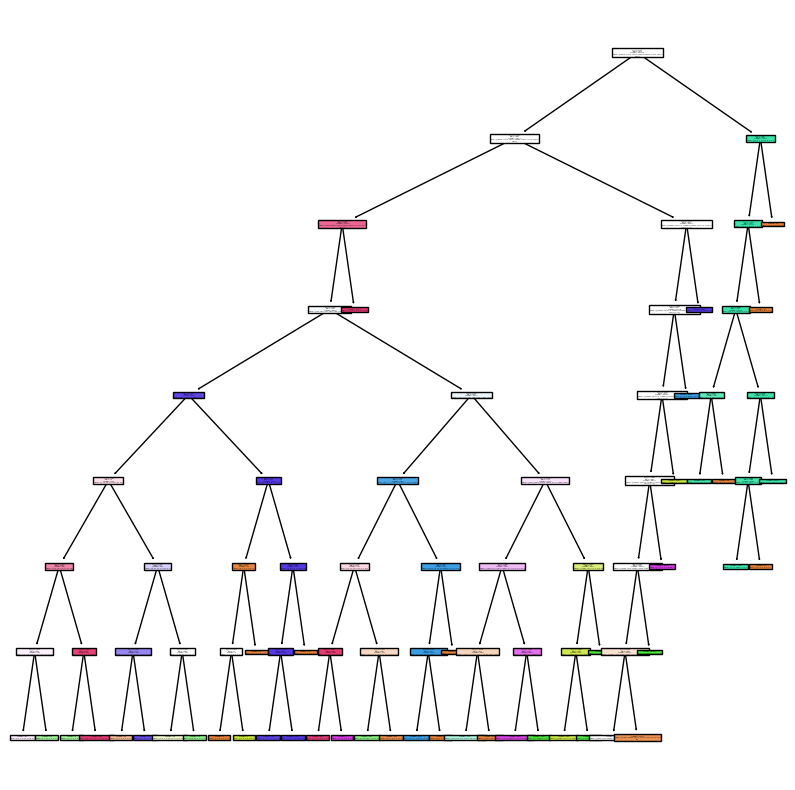

In [35]:
from sklearn import tree
dec = tree.DecisionTreeClassifier(max_depth=8)
dec = dec.fit(x_train,y_res)
acc = dec.score(x_train,y_res)
plt.figure(figsize=(10,10))
tree.plot_tree(dec,filled=True)
plt.show()

In [32]:
print(f'Accuracy of Decision Tree classifier on training set: {round(acc*100,2)} %')

Accuracy of Decision Tree classifier on training set: 76.88 %


# Saving model for future use

In [33]:
import joblib

model_filename = 'Random_forest_model.pkl'
joblib.dump(clf, model_filename)


['Random_forest_model.pkl']